In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import stats

import seaborn as sns

RANDOM_STATE = 42

## Data Exploration

### Preprocessing

In [2]:
data_folder = 'archive/'
df1 = pd.read_csv(data_folder + "genres_v2.csv", delimiter=',', header=0, 
                  dtype={'danceability':'float', 'energy':'float', 'key':'int', 'loudness':'float', 'mode':'int', 'speechiness':'float',
                         'acousticness':'float', 'instrumentalness':'float', 'liveness':'float', 'valence':'float', 'tempo':'float',
                         'type':'str', 'id':'str', 'uri':'str', 'track_href':'str', 'analysis_url':'str', 'duration_ms':'int','time_signature':'int', 
                         'genre':'str', 'song_name':'str', 'Unnamed: 0':'float', 'title':'str'})
df2 = pd.read_csv(data_folder + "playlists.csv", delimiter=',', header=0)

In [3]:
df1.describe(include='all')

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,...,id,uri,track_href,analysis_url,duration_ms,time_signature,genre,song_name,Unnamed: 0,title
count,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,...,42305,42305,42305,42305,42305.000000,42305.000000,42305,21519,20780.000000,20780
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,35877,35877,35877,35877,NaN,NaN,15,15439,NaN,132
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7D5qMGajdfznFcXFArk5VE,spotify:track:7D5qMGajdfznFcXFArk5VE,https://api.spotify.com/v1/tracks/7D5qMGajdfzn...,https://api.spotify.com/v1/audio-analysis/7D5q...,NaN,NaN,Underground Rap,Forever,NaN,Euphoric Hardstyle
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,9,9,9,9,NaN,NaN,5875,14,NaN,1398
mean,0.639364,0.762516,5.370240,-6.465442,0.549462,0.136561,0.096160,0.283048,0.214079,0.357101,...,NaN,NaN,NaN,NaN,250865.846685,3.972580,NaN,NaN,10483.970645,NaN
std,0.156617,0.183823,3.666145,2.941165,0.497553,0.126168,0.170827,0.370791,0.175576,0.233200,...,NaN,NaN,NaN,NaN,102957.713571,0.268342,NaN,NaN,6052.359519,NaN
min,0.065100,0.000243,0.000000,-33.357000,0.000000,0.022700,0.000001,0.000000,0.010700,0.018700,...,NaN,NaN,NaN,NaN,25600.000000,1.000000,NaN,NaN,0.000000,NaN
25%,0.524000,0.632000,1.000000,-8.161000,0.000000,0.049100,0.001730,0.000000,0.099600,0.161000,...,NaN,NaN,NaN,NaN,179840.000000,4.000000,NaN,NaN,5255.750000,NaN
50%,0.646000,0.803000,6.000000,-6.234000,1.000000,0.075500,0.016400,0.005940,0.135000,0.322000,...,NaN,NaN,NaN,NaN,224760.000000,4.000000,NaN,NaN,10479.500000,NaN
75%,0.766000,0.923000,9.000000,-4.513000,1.000000,0.193000,0.107000,0.722000,0.294000,0.522000,...,NaN,NaN,NaN,NaN,301133.000000,4.000000,NaN,NaN,15709.250000,NaN


In [4]:
df1['genre'].unique()

array(['Dark Trap', 'Underground Rap', 'Trap Metal', 'Emo', 'Rap', 'RnB',
       'Pop', 'Hiphop', 'techhouse', 'techno', 'trance', 'psytrance',
       'trap', 'dnb', 'hardstyle'], dtype=object)

In [5]:
df1['time_signature'].unique()

array([4, 3, 5, 1])

In [6]:
df1['title'].unique()[:20]

array([nan, 'Dirtybird Players', 'Tech House Movement', 'tech house',
       'Tech House Bangerz', 'blanc | Tech House', 'Toolroom Tech House',
       'Tech house', 'Dirtybird//Techhouse by Mack\\',
       'BOILER ROOM TECHNO HOUSE', 'Tech House Music 2020',
       'Tech House 2020 - Best of Techno', 'Tech House Rotation 2020',
       'Dirtybird House', 'Tech House Essentials by Distortion',
       'Tech House', 'Tech House 2020', 'Tech House by DOT Dance',
       'Beatoirt Best New Tech House', 'Tech House Elrow Secrets'],
      dtype=object)

#### Dealing with missing values

array([[<Axes: title={'center': 'danceability'}>,
        <Axes: title={'center': 'energy'}>,
        <Axes: title={'center': 'key'}>,
        <Axes: title={'center': 'loudness'}>],
       [<Axes: title={'center': 'mode'}>,
        <Axes: title={'center': 'speechiness'}>,
        <Axes: title={'center': 'acousticness'}>,
        <Axes: title={'center': 'instrumentalness'}>],
       [<Axes: title={'center': 'liveness'}>,
        <Axes: title={'center': 'valence'}>,
        <Axes: title={'center': 'tempo'}>,
        <Axes: title={'center': 'duration_ms'}>],
       [<Axes: title={'center': 'time_signature'}>,
        <Axes: title={'center': 'Unnamed: 0'}>, <Axes: >, <Axes: >]],
      dtype=object)

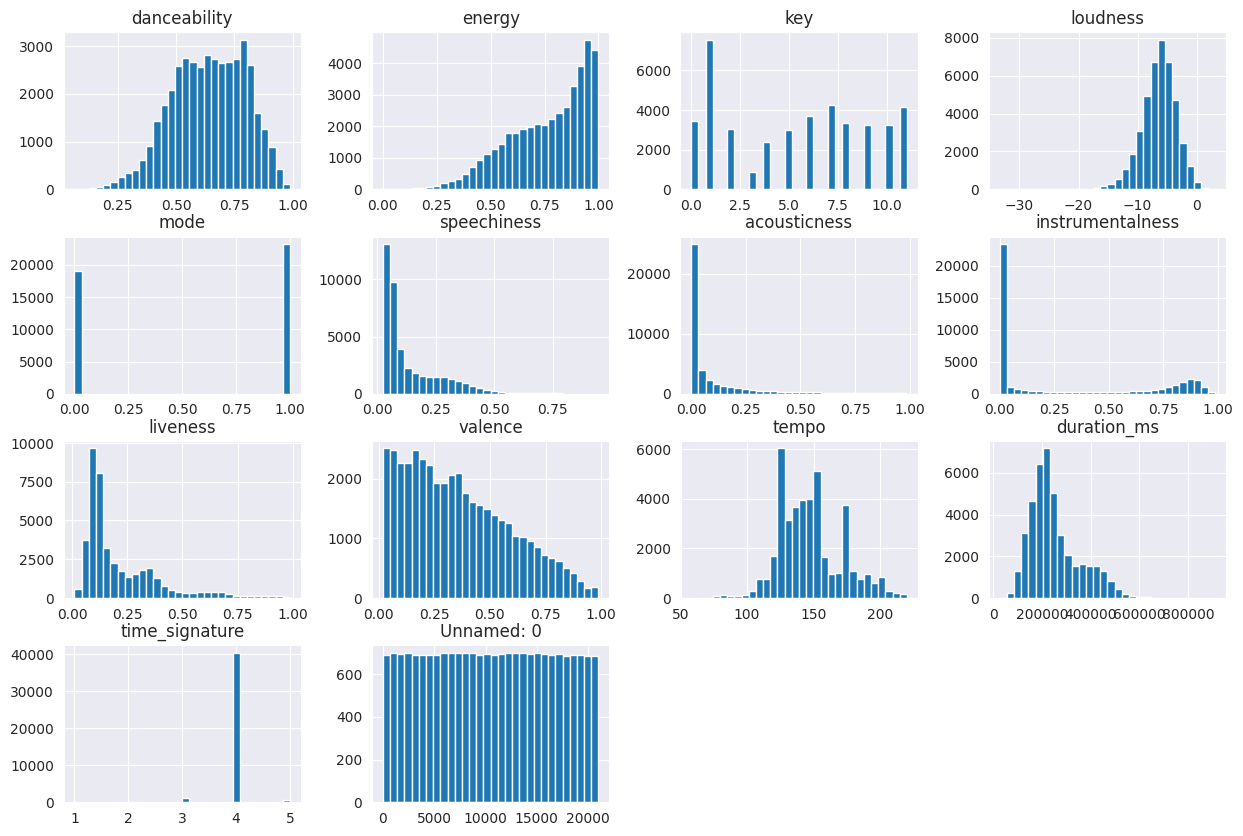

In [7]:
df1.hist(bins=30, figsize=(15, 10))

In [8]:
df1.shape

(42305, 22)

In [9]:
df1.isna().sum()

danceability            0
energy                  0
key                     0
loudness                0
mode                    0
speechiness             0
acousticness            0
instrumentalness        0
liveness                0
valence                 0
tempo                   0
type                    0
id                      0
uri                     0
track_href              0
analysis_url            0
duration_ms             0
time_signature          0
genre                   0
song_name           20786
Unnamed: 0          21525
title               21525
dtype: int64

In [10]:
## Finding out the meaning behind the unnamed column
# checking if all non-missing values of the empty column are integer
print('all_integer', np.array_equal(df1['Unnamed: 0'].notnull(), df1['Unnamed: 0'].notnull().astype(int)))

# checking  if missing values are at the same spots for 'title' and 'Unnamed'
print('same_spots', df1.loc[df1['title'].isna(), 'Unnamed: 0'].isna().all())

# renaming the column to a meaning we think it is
df1 = df1.rename(columns={"Unnamed: 0":"view_count"})

all_integer True
same_spots True


#### Dealing with duplicates

In [11]:
df1['track_href'].value_counts()

track_href
https://api.spotify.com/v1/tracks/7D5qMGajdfznFcXFArk5VE    9
https://api.spotify.com/v1/tracks/5cRDn5aGMLvWsldoRmOOz0    8
https://api.spotify.com/v1/tracks/5lXY6PTuWXOludKy4zDQwM    8
https://api.spotify.com/v1/tracks/3BSuC9Y6MhalaLlhyNbTYZ    8
https://api.spotify.com/v1/tracks/2KVv2zAjDHxymySY5EIaAz    7
                                                           ..
https://api.spotify.com/v1/tracks/6hEHxpZpvZwt1v4NoGwjKr    1
https://api.spotify.com/v1/tracks/5TvdhNXoHbeGeWtjCYhFuy    1
https://api.spotify.com/v1/tracks/0PIhZHuUMkxYIueyOJ9rSh    1
https://api.spotify.com/v1/tracks/2V28RKTOabMKk2xvIDyCEz    1
https://api.spotify.com/v1/tracks/6MAAMZImxcvYhRnxDLTufD    1
Name: count, Length: 35877, dtype: int64

In [12]:
df1['id'].value_counts()

id
7D5qMGajdfznFcXFArk5VE    9
5cRDn5aGMLvWsldoRmOOz0    8
5lXY6PTuWXOludKy4zDQwM    8
3BSuC9Y6MhalaLlhyNbTYZ    8
2KVv2zAjDHxymySY5EIaAz    7
                         ..
6hEHxpZpvZwt1v4NoGwjKr    1
5TvdhNXoHbeGeWtjCYhFuy    1
0PIhZHuUMkxYIueyOJ9rSh    1
2V28RKTOabMKk2xvIDyCEz    1
6MAAMZImxcvYhRnxDLTufD    1
Name: count, Length: 35877, dtype: int64

In [13]:
# removing duplicate columns
df1 = df1.drop(columns=['uri', 'track_href', 'analysis_url'])

# removing columns with many missing values
df1 = df1.drop(columns=["view_count", "title", "song_name"])

In [14]:
# the columns values are the same for all rows with the same 'id'
df1.loc[df1['id'] == '7D5qMGajdfznFcXFArk5VE']

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,duration_ms,time_signature,genre
37044,0.447,0.931,5,-3.879,0,0.0509,0.0475,0.225,0.283,0.141,173.992,audio_features,7D5qMGajdfznFcXFArk5VE,179561,4,dnb
37486,0.447,0.931,5,-3.879,0,0.0509,0.0475,0.225,0.283,0.141,173.992,audio_features,7D5qMGajdfznFcXFArk5VE,179561,4,dnb
37623,0.447,0.931,5,-3.879,0,0.0509,0.0475,0.225,0.283,0.141,173.992,audio_features,7D5qMGajdfznFcXFArk5VE,179561,4,dnb
37723,0.447,0.931,5,-3.879,0,0.0509,0.0475,0.225,0.283,0.141,173.992,audio_features,7D5qMGajdfznFcXFArk5VE,179561,4,dnb
38037,0.447,0.931,5,-3.879,0,0.0509,0.0475,0.225,0.283,0.141,173.992,audio_features,7D5qMGajdfznFcXFArk5VE,179561,4,dnb
38051,0.447,0.931,5,-3.879,0,0.0509,0.0475,0.225,0.283,0.141,173.992,audio_features,7D5qMGajdfznFcXFArk5VE,179561,4,dnb
38351,0.447,0.931,5,-3.879,0,0.0509,0.0475,0.225,0.283,0.141,173.992,audio_features,7D5qMGajdfznFcXFArk5VE,179561,4,dnb
38499,0.447,0.931,5,-3.879,0,0.0509,0.0475,0.225,0.283,0.141,173.992,audio_features,7D5qMGajdfznFcXFArk5VE,179561,4,dnb
39282,0.447,0.931,5,-3.879,0,0.0509,0.0475,0.225,0.283,0.141,173.992,audio_features,7D5qMGajdfznFcXFArk5VE,179561,4,dnb


In [15]:
# remove rows with duplicates of "id"
df1 = df1.drop_duplicates(subset=['id'])

#### Checking Outliers

In [16]:
df1.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,duration_ms,time_signature,genre
0,0.831,0.814,2,-7.364,1,0.4200,0.0598,0.013400,0.0556,0.3890,156.985,audio_features,2Vc6NJ9PW9gD9q343XFRKx,124539,4,Dark Trap
1,0.719,0.493,8,-7.230,1,0.0794,0.4010,0.000000,0.1180,0.1240,115.080,audio_features,7pgJBLVz5VmnL7uGHmRj6p,224427,4,Dark Trap
2,0.850,0.893,5,-4.783,1,0.0623,0.0138,0.000004,0.3720,0.0391,218.050,audio_features,0vSWgAlfpye0WCGeNmuNhy,98821,4,Dark Trap
3,0.476,0.781,0,-4.710,1,0.1030,0.0237,0.000000,0.1140,0.1750,186.948,audio_features,0VSXnJqQkwuH2ei1nOQ1nu,123661,3,Dark Trap
4,0.798,0.624,2,-7.668,1,0.2930,0.2170,0.000000,0.1660,0.5910,147.988,audio_features,4jCeguq9rMTlbMmPHuO7S3,123298,4,Dark Trap


In [17]:
df1.columns

Index(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'type', 'id', 'duration_ms', 'time_signature', 'genre'],
      dtype='object')

In [18]:
df1.time_signature.unique()

array([4, 3, 5, 1])

In [19]:
columns = ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms', 'time_signature']

for column  in columns:
    Q1 = df1[column].quantile(0.25)
    Q3 = df1[column].quantile(0.75)
    IQR = Q3 - Q1

    small_outliers = df1[column] < (Q1 - 1.5 * IQR)
    big_outliers = df1[column] > (Q3 + 1.5 * IQR)

    print(column, sum(small_outliers), sum(big_outliers))

danceability 42 0
energy 124 0
key 0 0
loudness 631 41
mode 0 0
speechiness 0 1755
acousticness 0 4465
instrumentalness 0 0
liveness 0 2097
valence 0 0
tempo 92 200
duration_ms 0 767
time_signature 1190 438


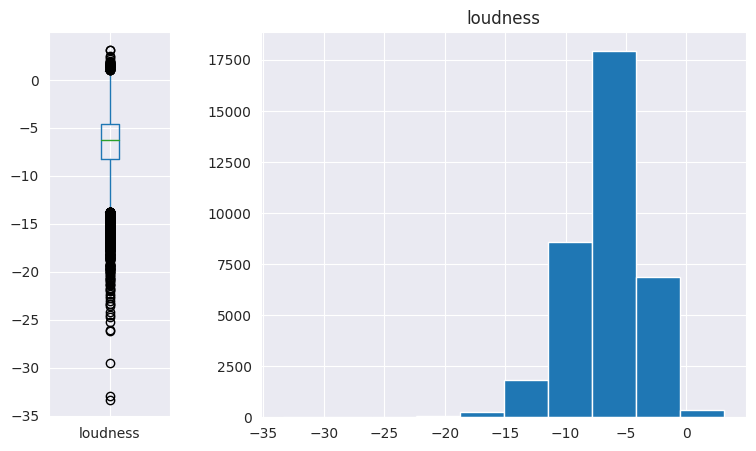

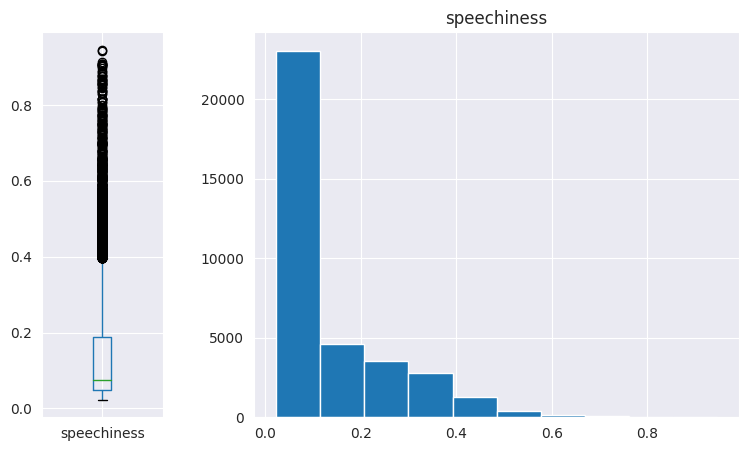

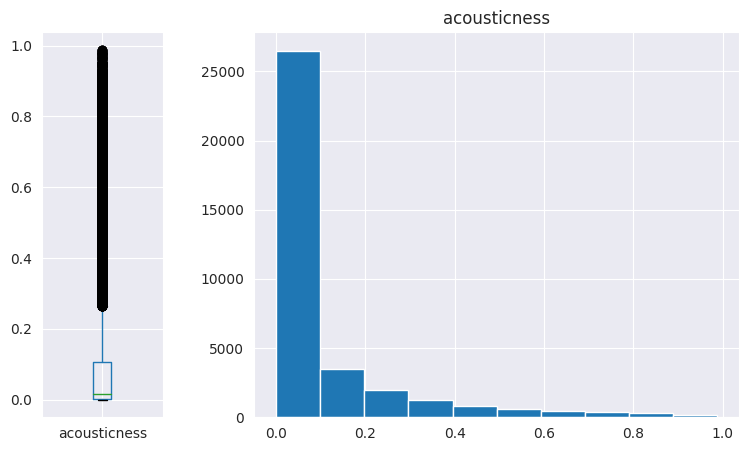

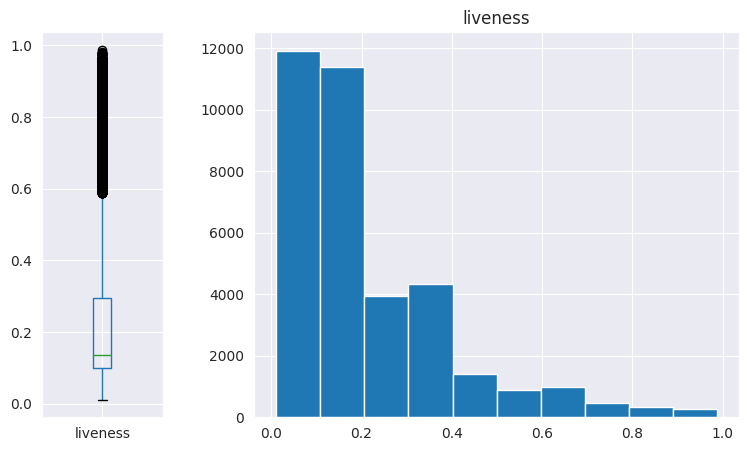

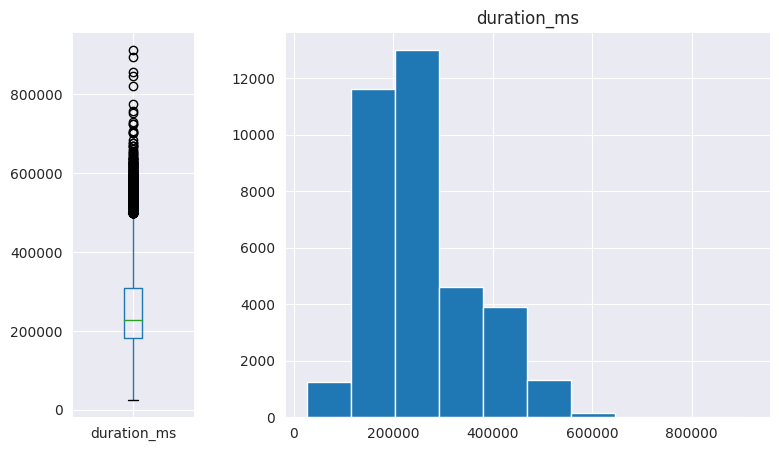

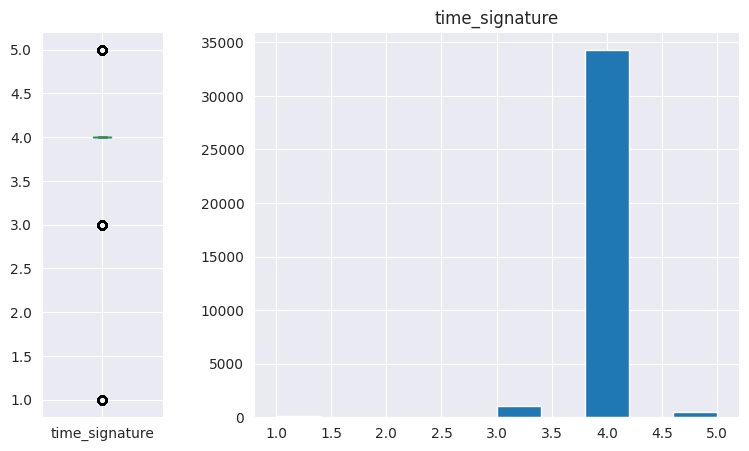

In [20]:
many_outliers = ['loudness', 'speechiness', 'acousticness', 'liveness', 'duration_ms', 'time_signature']
for column in many_outliers:
    fig, axes= plt.subplots(1,2, gridspec_kw={'width_ratios': [1, 4]}, figsize=(9,5))
    df1.boxplot(column=column,ax=axes[0]);
    df1.hist(column=column, ax=axes[1]);

In [21]:
z_score = stats.zscore(df1['loudness'])

/tmp/ipykernel_106298/3506744501.py:1: DeprecationWarning: Please use `zscore` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  z_score = stats.zscore(df1['loudness'])


In [22]:
(z_score > 1.5).sum()

1766

In [23]:
# converting categorical variables into object from int
df1.key = df1.key.astype('object')
df1['mode'] = df1['mode'].astype('object')
df1.time_signature = df1.time_signature.astype('object')

In [24]:
df1.columns

Index(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'type', 'id', 'duration_ms', 'time_signature', 'genre'],
      dtype='object')

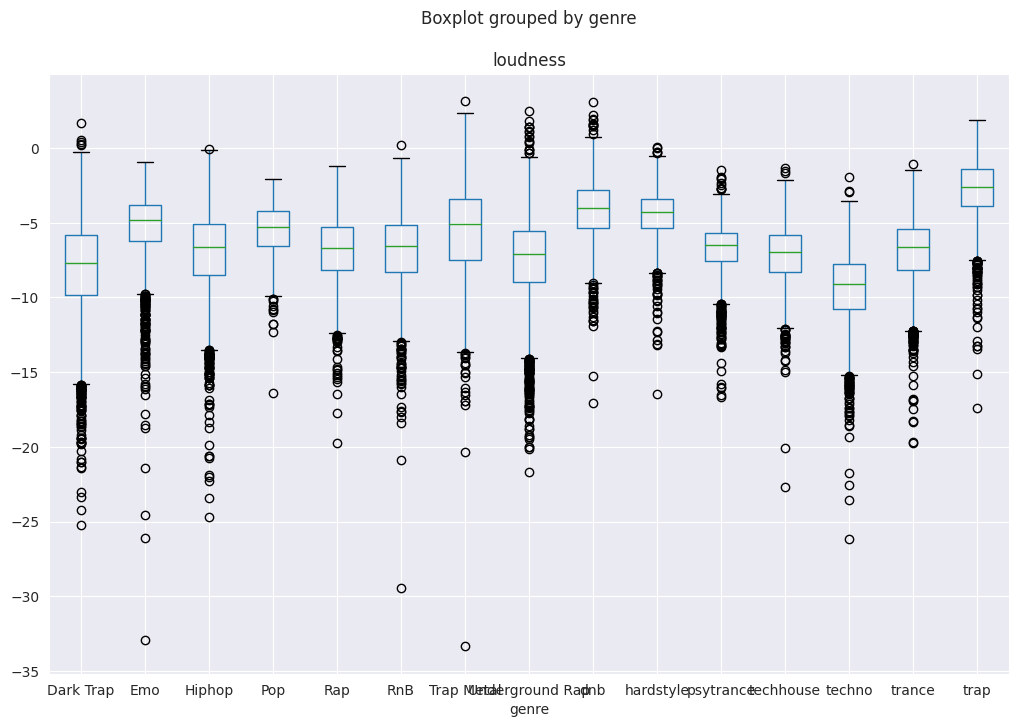

In [25]:
df1.boxplot(column='loudness',
                   by='genre',
                   figsize=(12,8));

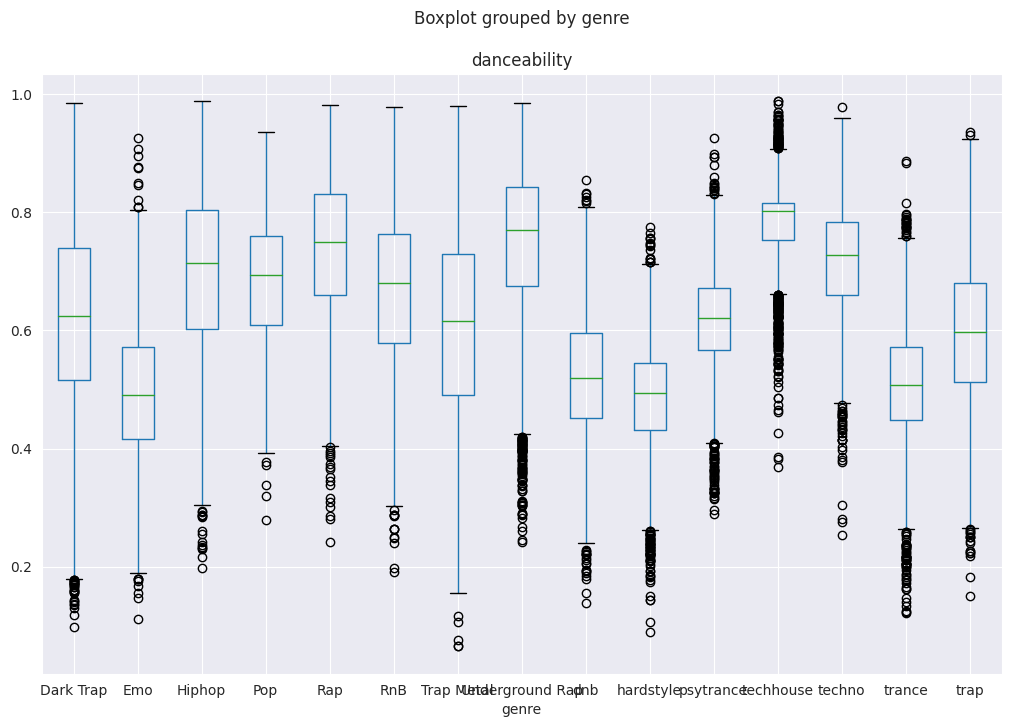

In [26]:
df1.boxplot(column='danceability',
                   by='genre',
                   figsize=(12,8));

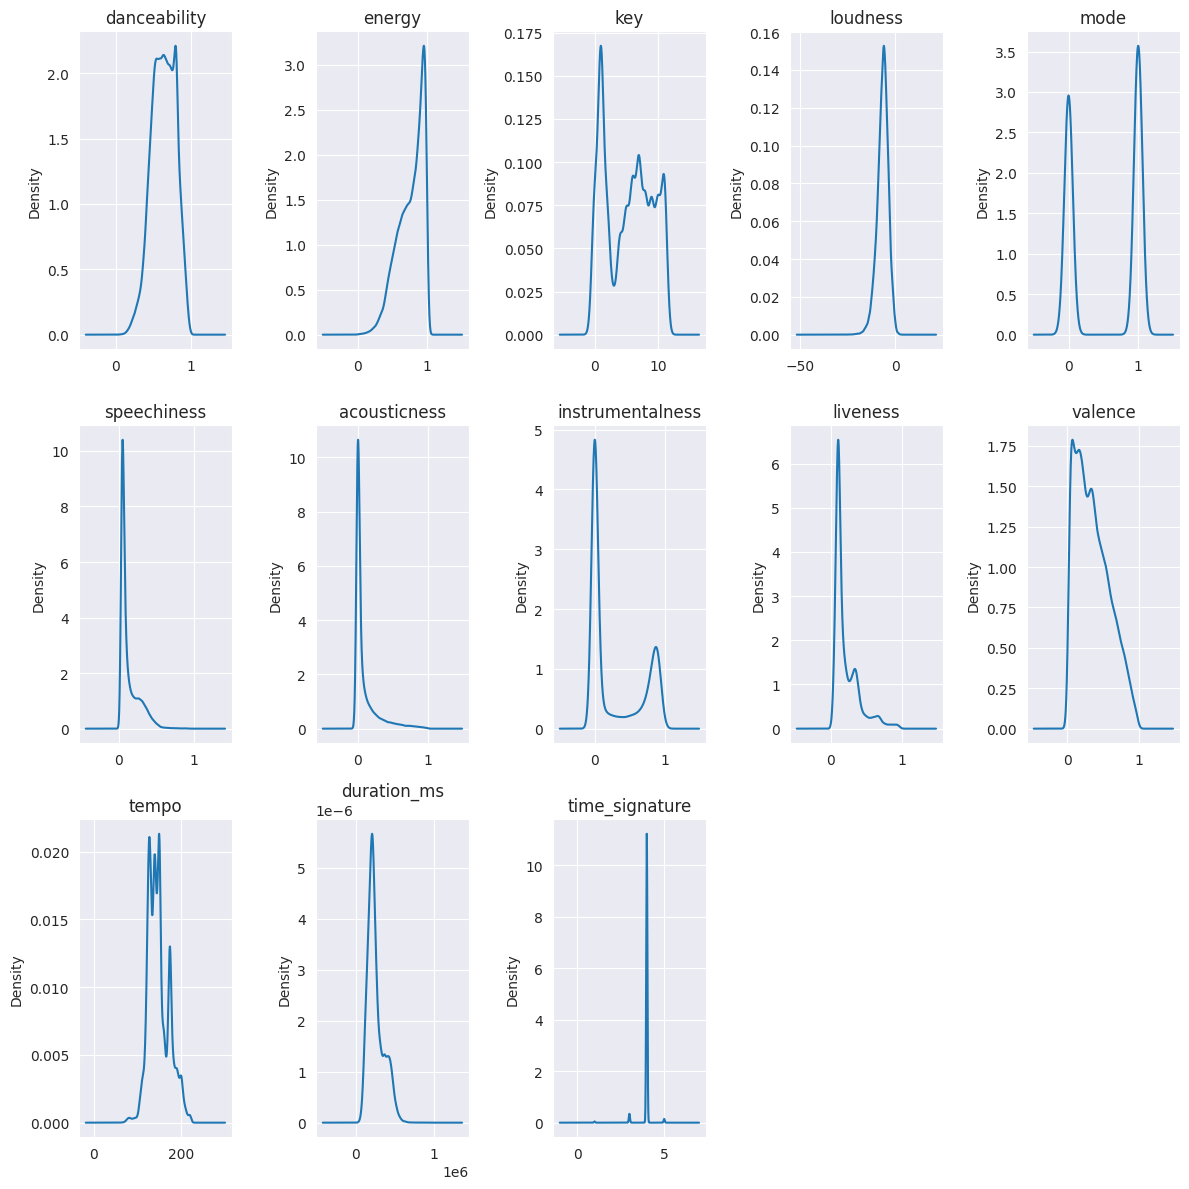

In [27]:
fig = plt.figure(figsize=(12,12))
columns = ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
           'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
           'duration_ms', 'time_signature']
for i, column in enumerate(columns):
    ax = fig.add_subplot(3, 5, i+1)
    df1[column].plot.kde()
    plt.title(column)
fig.tight_layout()

In [40]:
np.random.seed(RANDOM_STATE)
df = df1.sample(frac=1).reset_index(drop=True)

In [41]:
df.to_csv("archive/genres_dummyKey.csv", index=False)

In [42]:
df = pd.read_csv("archive/genres_dummyKey.csv")
# df = pd.read_csv("archive/genres_v3.csv")

#### Converting Categorical Variables into Numerical

In [43]:
key_dummies = pd.get_dummies(df.key, prefix="key")
df = pd.concat([df, key_dummies], axis='columns')
df = df.drop(['key'], axis='columns')

dummies = pd.get_dummies(df.time_signature, prefix="signature")
df = pd.concat([df, dummies], axis='columns')
df = df.drop(['time_signature', 'type'], axis='columns')
df.to_csv("archive/genres_dummyKey.csv")

#### Correlation Analysis

In [79]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_predict,cross_validate
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import KFold, GridSearchCV, StratifiedKFold, train_test_split, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from numpy import arange
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegressionCV, LogisticRegression
from sklearn.naive_bayes import BernoulliNB, GaussianNB, CategoricalNB

def preprocessing(X, y, scaler=None):    
    # We scale all the columns
    if scaler is None: 
        # We only want the scaler to fit the train data
        scaler = MinMaxScaler()
        X = scaler.fit_transform(X) # to prevent data leakage
    else: 
        X = scaler.transform(X) 
    return X, y, scaler

def tt_split(df, best_attrs=[]):
    if best_attrs == []:
        X = df.loc[:, ((df.columns != 'genre') & (df.columns != 'id'))]
    else:
        X = df.loc[:, best_attrs]
    y = df.loc[:, 'genre']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_STATE)
    return X_train, X_test, y_train, y_test

def evaluate(y_test, y_pred):
    print('accuracy', round(accuracy_score(y_test, y_pred), 3)*100)
    print('f1 macro', round(f1_score(y_test, y_pred, average='macro'), 3)*100)
    print('precision macro', round(precision_score(y_test, y_pred, average='macro'),3)*100)
    print('recall_macro', round(recall_score(y_test, y_pred, average='macro'),3)*100)

##### Feature Importance with Trees

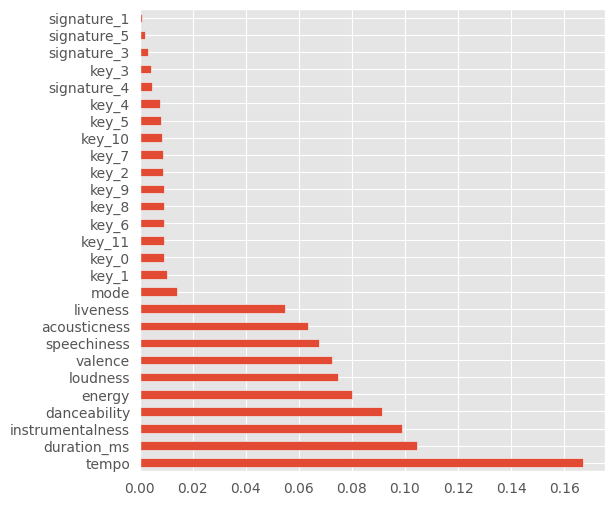

In [47]:
# Feature Importance with Trees
model = ExtraTreesClassifier()
X = df.loc[:, ((df.columns != 'genre') & (df.columns != 'id'))]
y = df.loc[:, 'genre']
model.fit(X,y)

plt.style.use('ggplot')
plt.figure(figsize=(6,6))
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(50).plot(kind='barh')
plt.show()

##### Recursive Feature Elimination

In [46]:
X, y, scaler = preprocessing(X,y)

model = KNeighborsClassifier(n_neighbors=10, metric='manhattan')
rfe = RFE(model)
fit = rfe.fit(X, y)
print("Num Features: %d" % fit.n_features_)
print("Selected Features: %s" % fit.support_)
print("Feature Ranking: %s" % fit.ranking_)

ValueError: when `importance_getter=='auto'`, the underlying estimator KNeighborsClassifier should have `coef_` or `feature_importances_` attribute. Either pass a fitted estimator to feature selector or call fit before calling transform.

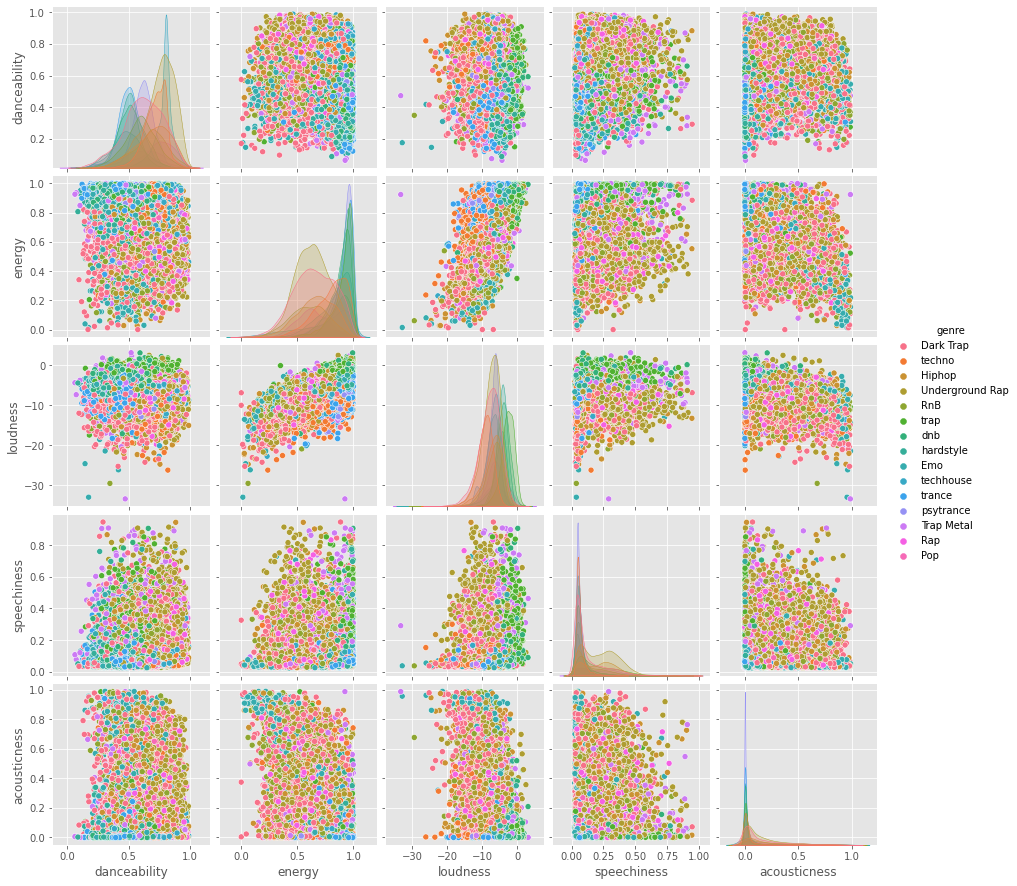

In [18]:
columns = ['danceability', 'energy', 'loudness', 'speechiness','acousticness', 'genre']
sns.pairplot(data=df[columns], hue='genre')

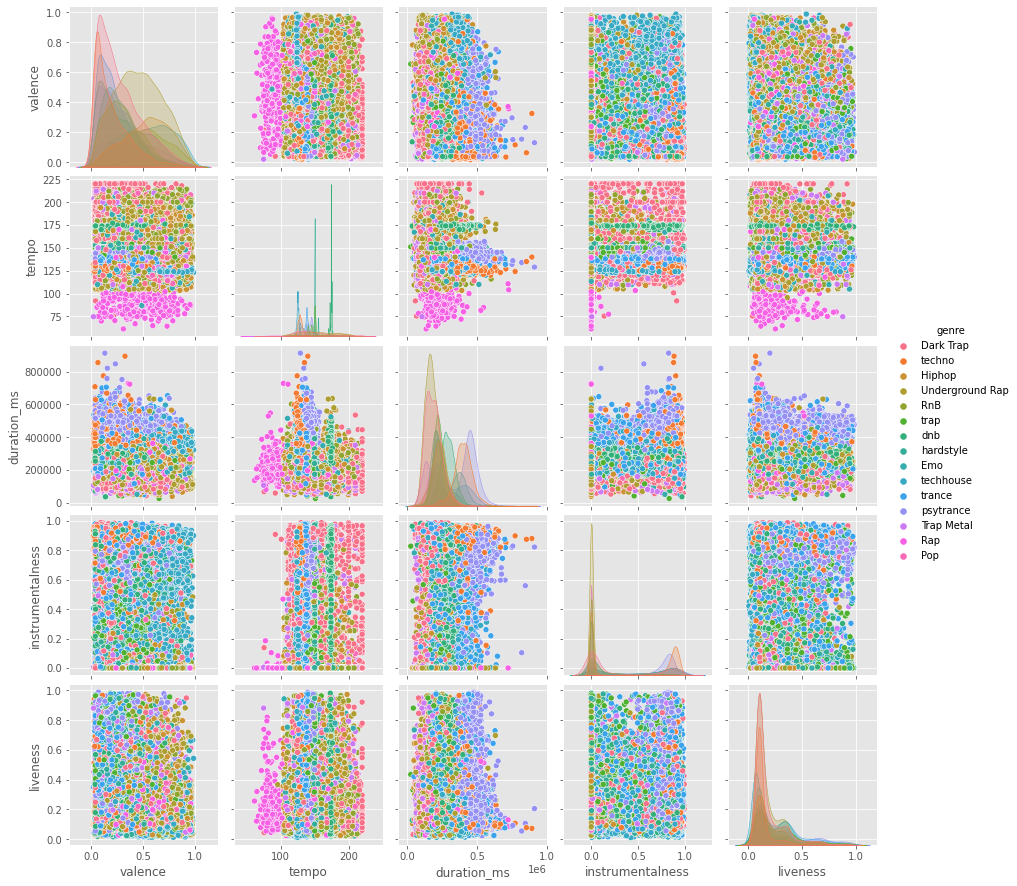

In [17]:
columns = ['valence', 'tempo','duration_ms','instrumentalness', 'liveness', 'genre']
sns.pairplot(data=df[columns], hue='genre')

## Classification into Genres

In [48]:
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

In [49]:
# df = df.drop(['id','time_signature', 'key'], axis=1)
df = df.drop(['id'], axis=1)

In [59]:
best_attrs = list(feat_importances.nlargest(12).keys())

In [60]:
best_attrs

['tempo',
 'duration_ms',
 'instrumentalness',
 'danceability',
 'energy',
 'loudness',
 'valence',
 'speechiness',
 'acousticness',
 'liveness',
 'mode',
 'key_1']

### LDA

In [53]:
best_attrs=['danceability', 'loudness', 'acousticness', 'tempo', 'duration_ms', 'time_signature']

In [61]:
X_train, X_test, y_train, y_test = tt_split(df)

# define the pipeline
steps = list()
steps.append(('scaler', MinMaxScaler()))
steps.append(('model', LinearDiscriminantAnalysis(solver='lsqr')))
pipeline = Pipeline(steps=steps)

# define the evaluation procedure
cv = StratifiedKFold(n_splits=10)

In [62]:
# Tuning solver
grid = dict()
grid['model__solver'] = ['svd', 'lsqr', 'eigen']

search = GridSearchCV(pipeline, grid, scoring='accuracy', cv=cv, n_jobs=-1)
results = search.fit(X_train, y_train)
print(results.best_score_, results.best_params_)

/home/arina/GitProjects/Spotify_Songs_Classification/venv/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
9 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/home/arina/GitProjects/Spotify_Songs_Classification/venv/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/arina/GitProjects/Spotify_Songs_Classification/venv/lib/python3.8/site-packages/sklearn/pipeline.py", line 405, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/home/arina/GitProjects/

0.5375769712018661 {'model__solver': 'svd'}


In [63]:
# Tuning shrinkage
grid = dict()
grid['model__shrinkage'] = arange(0, 1, 0.01)

search = GridSearchCV(pipeline, grid, scoring='accuracy', cv=cv, n_jobs=-1)
results = search.fit(X_train, y_train)
print(results.best_score_, results.best_params_)

0.5375421279962911 {'model__shrinkage': 0.0}


In [64]:
# obtaining accuracy for test data
X_train, X_test, y_train, y_test = tt_split(df,best_attrs)
X_train, y_train, scaler = preprocessing(X_train,y_train)
X_test, y_test, _ = preprocessing(X_test,y_test,scaler)

model = LinearDiscriminantAnalysis()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
evaluate(y_test, y_pred)

accuracy 53.1
f1 macro 48.5
precision macro 51.800000000000004
recall_macro 48.9


### QDA

In [65]:
X_train, X_test, y_train, y_test = tt_split(df, best_attrs)

# define the pipeline
steps = list()
steps.append(('scaler', MinMaxScaler()))
steps.append(('model', QuadraticDiscriminantAnalysis()))
pipeline = Pipeline(steps=steps)

# Tuning regularization
grid = dict()
grid['model__reg_param'] = arange(0, 1, 0.01)

search = GridSearchCV(pipeline, grid, scoring='accuracy', cv=cv, n_jobs=-1)
results = search.fit(X_train, y_train)
print(results.best_score_, results.best_params_)

0.6202922411669258 {'model__reg_param': 0.0}


In [67]:
# obtaining accuracy for test data
X_train, X_test, y_train, y_test = tt_split(df, best_attrs)
X_train, y_train, scaler = preprocessing(X_train,y_train)
X_test, y_test, _ = preprocessing(X_test,y_test,scaler)

model = QuadraticDiscriminantAnalysis()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
evaluate(y_test, y_pred)

accuracy 60.6
f1 macro 57.099999999999994
precision macro 58.9
recall_macro 58.9


### k-NN

In [68]:
X_train

array([[0.93618105, 0.0594398 , 0.        , ..., 0.14969815, 0.        ,
        0.        ],
       [0.45107906, 0.29050833, 0.92821031, ..., 0.06405403, 1.        ,
        0.        ],
       [0.79027683, 0.1000912 , 0.        , ..., 0.10569938, 1.        ,
        0.        ],
       ...,
       [0.62155226, 0.06858833, 0.        , ..., 0.12718715, 0.        ,
        0.        ],
       [0.12872607, 0.21592243, 0.        , ..., 0.15072138, 1.        ,
        1.        ],
       [0.80715935, 0.12549391, 0.        , ..., 0.40038883, 1.        ,
        1.        ]])

In [69]:
# define the pipeline
X_train, X_test, y_train, y_test = tt_split(df, best_attrs)
# X_train, X_test, y_train, y_test = tt_split(df)

steps = list()
steps.append(('scaler', MinMaxScaler()))
steps.append(('model', KNeighborsClassifier()))
pipeline = Pipeline(steps=steps)

grid = GridSearchCV(
    estimator=pipeline,
    param_grid={
        'model__n_neighbors': [1, 3, 5, 7, 10, 15, 20],
        'model__metric': ['euclidean', 'minkowski', 'manhattan']
    },
    scoring=['accuracy', 'f1_macro', 'precision_macro', 'recall_macro'],
    refit=False
)

grid.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                       ('model', KNeighborsClassifier())]),
             param_grid={'model__metric': ['euclidean', 'minkowski',
                                           'manhattan'],
                         'model__n_neighbors': [1, 3, 5, 7, 10, 15, 20]},
             refit=False,
             scoring=['accuracy', 'f1_macro', 'precision_macro',
                      'recall_macro'])

In [70]:
results_cv = pd.DataFrame(grid.cv_results_)

In [71]:
cols = ['param_model__n_neighbors', 'param_model__metric',
     'mean_test_accuracy',
    'mean_test_f1_macro', 'mean_test_precision_macro',
    'mean_test_recall_macro', 
    'std_test_accuracy', 'std_test_f1_macro', 'std_test_precision_macro',
    'std_test_recall_macro'
]
results_cv[cols].sort_values(by='mean_test_f1_macro',ascending=False)

,param_model__n_neighbors,param_model__metric,mean_test_accuracy,mean_test_f1_macro,mean_test_precision_macro,mean_test_recall_macro,std_test_accuracy,std_test_f1_macro,std_test_precision_macro,std_test_recall_macro
18,10,manhattan,0.596704,0.537416,0.557453,0.541545,0.006010,0.007809,0.009738,0.007165
17,7,manhattan,0.589143,0.536409,0.550252,0.540128,0.004630,0.006068,0.008006,0.005350
19,15,manhattan,0.598829,0.535998,0.567403,0.539736,0.004674,0.009369,0.015339,0.007681
20,20,manhattan,0.600781,0.533513,0.575063,0.538181,0.004974,0.008797,0.014969,0.007555
16,5,manhattan,0.580050,0.530899,0.540378,0.534187,0.004211,0.004584,0.005363,0.004348
10,7,minkowski,0.566113,0.513673,0.527409,0.516137,0.002829,0.002696,0.005511,0.002052
3,7,euclidean,0.566113,0.513673,0.527409,0.516137,0.002829,0.002696,0.005511,0.002052
15,3,manhattan,0.557576,0.513606,0.528169,0.514684,0.003984,0.006644,0.006298,0.007290
11,10,minkowski,0.570537,0.513476,0.533836,0.516134,0.005124,0.005563,0.008990,0.004356
4,10,euclidean,0.570537,0.513476,0.533836,0.516134,0.005124,0.005563,0.008990,0.004356


In [129]:
# obtaining accuracy for test data
X_train, X_test, y_train, y_test = tt_split(df, best_attrs)
X_train, y_train, scaler = preprocessing(X_train,y_train)
X_test, y_test, _ = preprocessing(X_test,y_test,scaler)

model = KNeighborsClassifier(n_neighbors=7, metric='manhattan')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
evaluate(y_test, y_pred)

/home/sayyor/.local/share/virtualenvs/race-charts-3Ukbqb5o/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


accuracy 61.3
f1 macro 56.699999999999996
precision macro 57.8
recall_macro 56.8


### Gaussian Naive Bayes

In [35]:
feat_importances[:12,]

danceability        0.090683
energy              0.078862
loudness            0.076659
mode                0.013574
speechiness         0.068161
acousticness        0.063608
instrumentalness    0.099605
liveness            0.054382
valence             0.071682
tempo               0.167044
duration_ms         0.102356
key_0               0.009548
dtype: float64

In [44]:
best_attrs = list(feat_importances.nlargest(8).keys())

In [26]:
# define the pipeline
# X_train, X_test, y_train, y_test = tt_split(df, best_attrs)
X_train, X_test, y_train, y_test = tt_split(df)

steps = list()
steps.append(('model', GaussianNB()))
pipeline = Pipeline(steps=steps)

grid = GridSearchCV(
    estimator=pipeline,
    param_grid={
        'model__var_smoothing': np.logspace(0,-9, num=100)
    },
    scoring=['accuracy', 'f1_macro', 'precision_macro', 'recall_macro'],
    refit=False
)

grid.fit(X_train, y_train)

/home/sayyor/.local/share/virtualenvs/race-charts-3Ukbqb5o/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/sayyor/.local/share/virtualenvs/race-charts-3Ukbqb5o/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/sayyor/.local/share/virtualenvs/race-charts-3Ukbqb5o/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

GridSearchCV(estimator=Pipeline(steps=[('model', GaussianNB())]),
             param_grid={'model__var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.57933225e-02, 5.33669923e-02, 4.32876128e-02,
       3.51...
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])},
             refit=False,
             scoring=['accuracy', 'f1_macro', 'precision_macro',
                      'recall_macro'])

In [27]:
results_cv = pd.DataFrame(grid.cv_results_)
cols = ['param_model__var_smoothing',
     'mean_test_accuracy',
    'mean_test_f1_macro', 'mean_test_precision_macro',
    'mean_test_recall_macro', 
    'std_test_accuracy', 'std_test_f1_macro', 'std_test_precision_macro',
    'std_test_recall_macro'
]
results_cv[cols].sort_values(by='mean_test_f1_macro',ascending=False)

,param_model__var_smoothing,mean_test_accuracy,mean_test_f1_macro,mean_test_precision_macro,mean_test_recall_macro,std_test_accuracy,std_test_f1_macro,std_test_precision_macro,std_test_recall_macro
99,0.0,0.487196,0.379455,0.415375,0.428460,0.004431,0.004301,0.051412,0.003252
98,0.0,0.484408,0.375576,0.390531,0.425474,0.004748,0.004361,0.030730,0.003666
97,0.0,0.480715,0.371519,0.381404,0.421517,0.005022,0.004628,0.029176,0.004170
96,0.0,0.476464,0.367122,0.377785,0.417410,0.003497,0.003421,0.029271,0.003313
95,0.0,0.470053,0.361518,0.360977,0.411210,0.003030,0.002985,0.004978,0.003073
...,...,...,...,...,...,...,...,...,...
4,0.432876,0.248702,0.109441,0.094932,0.168406,0.004088,0.002879,0.010247,0.003733
3,0.53367,0.246995,0.108603,0.094983,0.166348,0.004223,0.002675,0.008409,0.003752
2,0.657933,0.242082,0.105209,0.087968,0.161300,0.003650,0.002207,0.001599,0.003326
1,0.811131,0.238075,0.102358,0.087626,0.157084,0.003242,0.001896,0.001204,0.002988


In [28]:
# obtaining accuracy for test data
X_train, X_test, y_train, y_test = tt_split(df)
X_train, y_train, scaler = preprocessing(X_train,y_train)
X_test, y_test, _ = preprocessing(X_test,y_test,scaler)

model = GaussianNB(var_smoothing=0.000231)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
evaluate(y_test, y_pred)

accuracy 49.2
f1 macro 44.5
precision macro 48.6
recall_macro 48.5


### Logistic Regression

In [ ]:
best_attrs = list(feat_importances.nlargest(8).keys())

In [12]:
# define the pipeline
# X_train, X_test, y_train, y_test = tt_split(df, best_attrs)
X_train, X_test, y_train, y_test = tt_split(df)

steps = list()
steps.append(('scaler', MinMaxScaler()))
steps.append(('model', LogisticRegression(n_jobs=-1, penalty='elasticnet')))
pipeline = Pipeline(steps=steps)

grid = GridSearchCV(
    estimator=pipeline,
    param_grid={
        "model__C": [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10],
        "model__solver": ['newton-cg', 'sag', 'saga'],
        "model__l1_ratio": np.linspace(0, 1, 6)
    },
    scoring=['accuracy', 'f1_macro', 'precision_macro', 'recall_macro'],
    refit=False
)

grid.fit(X_train, y_train)

/home/sayyor/.local/share/virtualenvs/race-charts-3Ukbqb5o/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/sayyor/.local/share/virtualenvs/race-charts-3Ukbqb5o/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/sayyor/.local/share/virtualenvs/race-charts-3Ukbqb5o/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

GridSearchCV(estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                       ('model',
                                        LogisticRegression(n_jobs=-1,
                                                           penalty='elasticnet'))]),
             param_grid={'model__C': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10],
                         'model__l1_ratio': array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
                         'model__solver': ['newton-cg', 'sag', 'saga']},
             refit=False,
             scoring=['accuracy', 'f1_macro', 'precision_macro',
                      'recall_macro'])

In [14]:
results_cv = pd.DataFrame(grid.cv_results_)
cols = ['param_model__C', 'param_model__solver', "param_model__l1_ratio",
     'mean_test_accuracy',
    'mean_test_f1_macro', 'mean_test_precision_macro',
    'mean_test_recall_macro', 
    'std_test_accuracy', 'std_test_f1_macro', 'std_test_precision_macro',
    'std_test_recall_macro'
]
results_cv[cols].sort_values(by='mean_test_f1_macro',ascending=False)

,param_model__C,param_model__solver,param_model__l1_ratio,mean_test_accuracy,mean_test_f1_macro,mean_test_precision_macro,mean_test_recall_macro,std_test_accuracy,std_test_f1_macro,std_test_precision_macro,std_test_recall_macro
125,10,saga,1.0,0.591164,0.532478,0.576855,0.530509,0.003501,0.003406,0.017087,0.003334
122,10,saga,0.8,0.590816,0.531817,0.574859,0.529985,0.003567,0.002978,0.018716,0.002918
119,10,saga,0.6,0.590781,0.531207,0.572517,0.529620,0.003491,0.003138,0.019144,0.003021
116,10,saga,0.4,0.590467,0.530440,0.574143,0.528936,0.003186,0.003009,0.018733,0.002816
113,10,saga,0.2,0.590049,0.530045,0.574127,0.528479,0.003197,0.003123,0.019141,0.002898
...,...,...,...,...,...,...,...,...,...,...,...
118,10,sag,0.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
120,10,newton-cg,0.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
121,10,sag,0.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
123,10,newton-cg,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
# obtaining accuracy for test data
X_train, X_test, y_train, y_test = tt_split(df)
X_train, y_train, scaler = preprocessing(X_train,y_train)
X_test, y_test, _ = preprocessing(X_test,y_test,scaler)

model = LogisticRegression(C=10, solver='saga', l1_ratio=1.0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
evaluate(y_test, y_pred)

/home/sayyor/.local/share/virtualenvs/race-charts-3Ukbqb5o/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/home/sayyor/.local/share/virtualenvs/race-charts-3Ukbqb5o/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


accuracy 58.9
f1 macro 53.400000000000006
precision macro 56.8
recall_macro 53.400000000000006


### Decision Tree

In [81]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
# import graphviz
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import classification_report, make_scorer, f1_score, recall_score
from sklearn import metrics
from scipy.stats import randint

#### Tuning Decision Model

In [24]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15, 20, 25, 30],
    'min_samples_split': [1, 2, 3, 4, 5],
    'min_samples_leaf': [1, 2, 3, 4, 5],
    'max_features': ['auto', 'sqrt', 'log2', None]
}

In [32]:
# define the pipeline
# X_train, X_test, y_train, y_test = tt_split(df, best_attrs)
X_train, X_test, y_train, y_test = tt_split(df)

model = DecisionTreeClassifier()

grid = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    scoring=['accuracy', 'f1_macro', 'precision_macro', 'recall_macro'],
    refit=False,
    n_jobs=-1
)

grid.fit(X_train, y_train)

/home/sayyor/.local/share/virtualenvs/race-charts-3Ukbqb5o/lib/python3.8/site-packages/sklearn/tree/_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/home/sayyor/.local/share/virtualenvs/race-charts-3Ukbqb5o/lib/python3.8/site-packages/sklearn/tree/_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/home/sayyor/.local/share/virtualenvs/race-charts-3Ukbqb5o/lib/python3.8/site-packages/sklearn/tree/_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/home/sayyor/.local/share/virtualenvs/race-charts-3Ukbqb5o/lib/python3.8/site-packages/sklearn/tree/_classes.py:298: FutureW

GridSearchCV(estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 10, 15, 20, 25, 30],
                         'max_features': ['auto', 'sqrt', 'log2', None],
                         'min_samples_leaf': [1, 2, 3, 4, 5],
                         'min_samples_split': [1, 2, 3, 4, 5]},
             refit=False,
             scoring=['accuracy', 'f1_macro', 'precision_macro',
                      'recall_macro'])

In [36]:
param_grid.keys()

dict_keys(['criterion', 'max_depth', 'min_samples_split', 'min_samples_leaf', 'max_features'])

In [37]:
results_cv = pd.DataFrame(grid.cv_results_)
cols = ['param_criterion', 'param_max_depth', "param_min_samples_split",
        "param_min_samples_leaf", "param_max_features", 'mean_test_accuracy',
        'mean_test_f1_macro', 'mean_test_precision_macro','mean_test_recall_macro', 
        'std_test_accuracy', 'std_test_f1_macro', 'std_test_precision_macro',
        'std_test_recall_macro'
]
results_cv[cols].sort_values(by='mean_test_f1_macro',ascending=False)

,param_criterion,param_max_depth,param_min_samples_split,param_min_samples_leaf,param_max_features,mean_test_accuracy,mean_test_f1_macro,mean_test_precision_macro,mean_test_recall_macro,std_test_accuracy,std_test_f1_macro,std_test_precision_macro,std_test_recall_macro
396,gini,15,2,5,None,0.619177,0.577349,0.589779,0.571051,0.004800,0.005753,0.006370,0.005770
278,gini,10,4,1,None,0.628201,0.576816,0.619384,0.568040,0.006607,0.005569,0.003083,0.007641
281,gini,10,2,2,None,0.628062,0.576803,0.619079,0.567910,0.006573,0.005559,0.002994,0.007546
398,gini,15,4,5,None,0.618515,0.576677,0.588870,0.570402,0.004541,0.005315,0.005847,0.005263
283,gini,10,4,2,None,0.628166,0.576587,0.618482,0.567770,0.006863,0.005727,0.003657,0.007665
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1375,entropy,30,1,1,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1380,entropy,30,1,2,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1385,entropy,30,1,3,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1390,entropy,30,1,4,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
X_train, X_test, y_train, y_test = tt_split(df)
X_train, y_train, scaler = preprocessing(X_train,y_train)
X_test, y_test, _ = preprocessing(X_test,y_test,scaler)

model = DecisionTreeClassifier(
    criterion='gini', max_depth=15, min_samples_split=2,
    min_samples_leaf=5,max_features=None)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
evaluate(y_test, y_pred)

accuracy 61.7
f1 macro 57.599999999999994
precision macro 59.3
recall_macro 56.99999999999999


### Random Forest

In [82]:
from sklearn.ensemble import RandomForestClassifier

In [41]:
model_rf = RandomForestClassifier()

param_grid = {
    'n_estimators': [100, 200, 500],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [2, 5, 10],
    'class_weight': [None, 'balanced', 'balanced_subsample']
}

In [43]:
# define the pipeline
# X_train, X_test, y_train, y_test = tt_split(df, best_attrs)
X_train, X_test, y_train, y_test = tt_split(df)

model = RandomForestClassifier()

grid = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    scoring=['accuracy', 'f1_macro', 'precision_macro', 'recall_macro'],
    refit=False,
    n_jobs=-1
)

grid.fit(X_train, y_train)

/home/sayyor/.local/share/virtualenvs/race-charts-3Ukbqb5o/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/home/sayyor/.local/share/virtualenvs/race-charts-3Ukbqb5o/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/sayyor/.local/share/virtualenvs/race-charts-3Ukbqb5o/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/sayyor/

GridSearchCV(estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'class_weight': [None, 'balanced',
                                          'balanced_subsample'],
                         'max_depth': [None, 5, 10],
                         'min_samples_leaf': [2, 5, 10],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 500]},
             refit=False,
             scoring=['accuracy', 'f1_macro', 'precision_macro',
                      'recall_macro'])

In [44]:
param_grid.keys()

dict_keys(['n_estimators', 'max_depth', 'min_samples_split', 'min_samples_leaf', 'class_weight'])

In [45]:
results_cv = pd.DataFrame(grid.cv_results_)
cols = ['param_n_estimators', 'param_max_depth', "param_min_samples_split",
        "param_min_samples_leaf", "param_class_weight", 'mean_test_accuracy',
        'mean_test_f1_macro', 'mean_test_precision_macro','mean_test_recall_macro', 
        'std_test_accuracy', 'std_test_f1_macro', 'std_test_precision_macro',
        'std_test_recall_macro'
]
results_cv[cols].sort_values(by='mean_test_f1_macro',ascending=False)

,param_n_estimators,param_max_depth,param_min_samples_split,param_min_samples_leaf,param_class_weight,mean_test_accuracy,mean_test_f1_macro,mean_test_precision_macro,mean_test_recall_macro,std_test_accuracy,std_test_f1_macro,std_test_precision_macro,std_test_recall_macro
86,500,None,5,2,balanced,0.696108,0.659330,0.679769,0.655675,0.003157,0.000950,0.006673,0.001927
166,200,None,5,2,balanced_subsample,0.695481,0.658689,0.675872,0.655710,0.001927,0.001883,0.004740,0.001889
89,500,None,10,2,balanced,0.690951,0.658579,0.661582,0.661800,0.003347,0.001847,0.005403,0.001470
170,500,None,10,2,balanced_subsample,0.690673,0.657966,0.660622,0.661313,0.002040,0.002704,0.004937,0.001927
82,200,None,2,2,balanced,0.695829,0.657894,0.681011,0.653127,0.002314,0.002947,0.006122,0.002669
...,...,...,...,...,...,...,...,...,...,...,...,...,...
40,200,5,5,5,None,0.587679,0.479072,0.614251,0.492137,0.006734,0.006010,0.051979,0.006825
48,100,5,5,10,None,0.586321,0.477662,0.561299,0.491049,0.006568,0.005573,0.052743,0.006170
27,100,5,2,2,None,0.587715,0.477657,0.588476,0.491302,0.005229,0.009980,0.052026,0.007397
45,100,5,2,10,None,0.585868,0.476709,0.577005,0.490280,0.004236,0.005521,0.019227,0.004695


In [46]:
X_train, X_test, y_train, y_test = tt_split(df)
X_train, y_train, scaler = preprocessing(X_train,y_train)
X_test, y_test, _ = preprocessing(X_test,y_test,scaler)

model = RandomForestClassifier(
    n_estimators=500,max_depth=None,min_samples_split=5,
    min_samples_leaf=2,class_weight="balanced"
)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
evaluate(y_test, y_pred)

accuracy 69.6
f1 macro 66.3
precision macro 68.0
recall_macro 66.0


### Ensemble

In [90]:
from sklearn.ensemble import VotingClassifier

In [91]:
X_train, X_test, y_train, y_test = tt_split(df)
X_train, y_train, scaler = preprocessing(X_train,y_train)
X_test, y_test, _ = preprocessing(X_test,y_test,scaler)

In [92]:
knn_classifier = KNeighborsClassifier(n_neighbors=7, metric='manhattan')
knn_classifier.fit(X_train, y_train)
knn_pred = knn_classifier.predict(X_test)

In [93]:
lda_classifier = LinearDiscriminantAnalysis()
lda_classifier.fit(X_train, y_train)
lda_pred = lda_classifier.predict(X_test)

In [94]:
qda_classifier = QuadraticDiscriminantAnalysis()
qda_classifier.fit(X_train, y_train)
qda_pred = qda_classifier.predict(X_test)

/home/arina/GitProjects/Spotify_Songs_Classification/venv/lib/python3.8/site-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


In [95]:
dt_classifier = model = DecisionTreeClassifier(
    criterion='gini', max_depth=15, min_samples_split=2,
    min_samples_leaf=5,max_features=None)
dt_classifier.fit(X_train, y_train)
dt_pred = dt_classifier.predict(X_test)

In [96]:
rf_classifier = RandomForestClassifier(
    n_estimators=500,max_depth=None,min_samples_split=5,
    min_samples_leaf=2,class_weight="balanced")
rf_classifier.fit(X_train, y_train)
rf_pred = rf_classifier.predict(X_test)

In [97]:
nb_classifier = GaussianNB(var_smoothing=0.000231)
nb_classifier.fit(X_train, y_train)
nb_pred = nb_classifier.predict(X_test)

In [98]:
lr_classifier = LogisticRegression(C=10, solver='saga', l1_ratio=1.0)
lr_classifier.fit(X_train, y_train)
lr_pred = lr_classifier.predict(X_test)

/home/arina/GitProjects/Spotify_Songs_Classification/venv/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/home/arina/GitProjects/Spotify_Songs_Classification/venv/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [100]:
ensemble_pred = []
for i in range(len(X_test)):
    votes = [lda_pred[i], qda_pred[i], knn_pred[i], nb_pred[i], lr_pred[i], dt_pred[i], rf_pred[i]]
    ensemble_pred.append(max(set(votes), key=votes.count))

In [106]:
accuracy = accuracy_score(y_test, ensemble_pred)
f1_macro = f1_score(y_test, ensemble_pred, average='macro')
precision_macro = precision_score(y_test, ensemble_pred, average='macro')
recall_macro = recall_score(y_test, ensemble_pred, average='macro')

In [107]:
print("Accuracy:", accuracy)
print("F1 Macro:", f1_macro)
print("Precision Macro:", precision_macro)
print("Recall Macro:", recall_macro)

Accuracy: 0.6417224080267558
F1 Macro: 0.5960527634318074
Precision Macro: 0.6220491536121014
Recall Macro: 0.5981792068253164
